In [1]:
import pandas as pd
import numpy as np

data=pd.read_excel('data/filtered_data1.xlsx',index_col=None)
data

,SMILES,pIC50,naAromAtom,nAromBond,nF,nX,ATSc3,BCUTw-1l,BCUTc-1l,BCUTc-1h,...,nTRing,nT5Ring,nT6Ring,nT9Ring,nT10Ring,nT11Ring,nTG12Ring,LipinskiFailures,VAdjMat,WTPT-2
0,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5C...,8.602060,12,12.0,0.0,0.0,-0.126453,11.85,-0.360525,0.185437,...,6.0,1.0,4.0,0.0,1.0,0.0,0.0,0.0,5.954196,2.089409
1,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN...,8.124939,12,12.0,0.0,0.0,-0.126453,11.85,-0.360530,0.185459,...,6.0,0.0,4.0,0.0,1.0,0.0,0.0,1.0,6.044394,2.089698
2,Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN...,8.508638,18,18.0,0.0,0.0,-0.143126,11.85,-0.361379,0.116954,...,6.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,6.044394,2.083301
3,Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCC...,8.408935,12,12.0,0.0,0.0,-0.126504,11.85,-0.360530,0.185459,...,6.0,0.0,5.0,0.0,1.0,0.0,0.0,1.0,6.044394,2.087385
4,Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCC...,8.130768,18,18.0,0.0,0.0,-0.128690,11.85,-0.360530,0.185459,...,6.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,6.044394,2.087385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,COc1cc(OC)cc(\C=C\c2cccc(OS(=O)(=O)C3CC4OC3C(=...,6.131944,24,24.0,0.0,0.0,0.060040,11.85,-0.363905,0.278515,...,7.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,6.426265,2.063023
1970,Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4cccc(\C=C\...,5.850781,24,24.0,0.0,0.0,0.051389,11.85,-0.364009,0.278503,...,7.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,6.357552,2.064929
1971,Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4ccc(\C=C\c...,7.721246,24,24.0,0.0,0.0,0.051394,11.85,-0.364009,0.278503,...,7.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,6.357552,2.064894
1972,Oc1ccc(cc1)C2=C([C@H]3O[C@H]2C[C@@H]3S(=O)(=O)...,7.886057,18,18.0,0.0,0.0,0.060397,11.85,-0.363866,0.278460,...,6.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,5.954196,2.070043


In [2]:
data.columns

Index(['SMILES', 'pIC50', 'naAromAtom', 'nAromBond', 'nF', 'nX', 'ATSc3',
       'BCUTw-1l', 'BCUTc-1l', 'BCUTc-1h',
       ...
       'nTRing', 'nT5Ring', 'nT6Ring', 'nT9Ring', 'nT10Ring', 'nT11Ring',
       'nTG12Ring', 'LipinskiFailures', 'VAdjMat', 'WTPT-2'],
      dtype='object', length=239)

In [3]:
# 随机森林求得特征重要性
from sklearn.ensemble import RandomForestRegressor

X = data.iloc[:, 2:]
Y = data.loc[:, ['pIC50']]
names = data.columns[2:]

# 创建随机森林模型
rf = RandomForestRegressor()

# 拟合模型
rf.fit(X, Y)

# 结果转为dataframe
feature_importance = pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names),reverse=True), columns=['importance', 'feature'])
# 将jndex设置为feature
feature_importance.set_index('feature', inplace=True)
feature_importance

/Users/zhengjie/20232024a/2024论文/venv/lib/python3.9/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,importance
feature,
MDEC-23,0.2226
LipoaffinityIndex,0.0556
BCUTc-1l,0.0499
minsssN,0.0337
maxssO,0.0329
...,...
StN,0.0000
SdCH2,0.0000
SHdCH2,0.0000


In [4]:
# 求每列与pic50的最大互信息数
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(X, Y)
mi = pd.DataFrame(mi, index=X.columns, columns=['mi'])
# index的列名为feature
mi.index.name = 'feature'
mi

/Users/zhengjie/20232024a/2024论文/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,mi
feature,
naAromAtom,0.244738
nAromBond,0.220864
nF,0.021388
nX,0.010331
ATSc3,0.195462
...,...
nT11Ring,0.025451
nTG12Ring,0.066950
LipinskiFailures,0.017852


In [5]:
# 求每列与pic50的皮尔逊相关系数
from scipy.stats import pearsonr
pearson = []
for i in range(X.shape[1]):
    pearson.append(pearsonr(X.iloc[:, i], Y.iloc[:, 0])[0])
pearson = pd.DataFrame(pearson, index=X.columns, columns=['pearson'])
pearson.index.name = 'feature'
pearson

,pearson
feature,
naAromAtom,0.325469
nAromBond,0.286066
nF,0.097161
nX,0.025056
ATSc3,-0.362896
...,...
nT11Ring,0.177668
nTG12Ring,-0.060848
LipinskiFailures,0.110138


In [9]:
# 求每列与pic50的距离相关系数不是sperman相关系数
import dcor
dcor_list = []
for i in range(X.shape[1]):
    dcor_list.append(dcor.distance_correlation(np.array(X.iloc[:, i]), np.array(Y.iloc[:, 0])))
dcor_list = pd.DataFrame(dcor_list, index=X.columns, columns=['dcor'])
dcor_list.index.name = 'feature'
dcor_list

/Users/zhengjie/20232024a/2024论文/venv/lib/python3.9/site-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(int64, 1d, C), array(float64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(


,dcor
feature,
naAromAtom,0.359348
nAromBond,0.318396
nF,0.108237
nX,0.051989
ATSc3,0.374505
...,...
nT11Ring,0.187285
nTG12Ring,0.109559
LipinskiFailures,0.124951


In [10]:
# 将四个指标合并到一张表中
feature_importance = feature_importance.merge(mi, left_index=True, right_index=True)
feature_importance = feature_importance.merge(pearson, left_index=True, right_index=True)
feature_importance = feature_importance.merge(dcor_list, left_index=True, right_index=True)
feature_importance

,importance,mi,pearson,dcor
feature,,,,
MDEC-23,0.2226,0.283838,0.538050,0.542485
LipoaffinityIndex,0.0556,0.223771,0.495592,0.514669
BCUTc-1l,0.0499,0.355893,-0.324469,0.399551
minsssN,0.0337,0.181911,0.430690,0.426195
maxssO,0.0329,0.294111,0.224565,0.258582
...,...,...,...,...
StN,0.0000,0.010253,-0.077448,0.078134
SdCH2,0.0000,0.008512,-0.080563,0.089783
SHdCH2,0.0000,0.010940,-0.080563,0.089783


In [11]:
# 第五个指标是importance*另外三个之和的倒数（perason取绝对值）
feature_importance['score'] = (1 / (
            abs(feature_importance['mi']) + abs(feature_importance['pearson']) + abs(feature_importance['dcor']))) * feature_importance['importance']
feature_importance

,importance,mi,pearson,dcor,score
feature,,,,,
MDEC-23,0.2226,0.283838,0.538050,0.542485,0.163152
LipoaffinityIndex,0.0556,0.223771,0.495592,0.514669,0.045056
BCUTc-1l,0.0499,0.355893,-0.324469,0.399551,0.046207
minsssN,0.0337,0.181911,0.430690,0.426195,0.032441
maxssO,0.0329,0.294111,0.224565,0.258582,0.042328
...,...,...,...,...,...
StN,0.0000,0.010253,-0.077448,0.078134,0.000000
SdCH2,0.0000,0.008512,-0.080563,0.089783,0.000000
SHdCH2,0.0000,0.010940,-0.080563,0.089783,0.000000


In [13]:
# 筛选出score最高的20个特征
selected_feature=feature_importance.sort_values(by='score', ascending=False).iloc[:20, :]
selected_feature

,importance,mi,pearson,dcor,score
feature,,,,,
MDEC-23,0.2226,0.283838,0.538050,0.542485,0.163152
BCUTc-1l,0.0499,0.355893,-0.324469,0.399551,0.046207
LipoaffinityIndex,0.0556,0.223771,0.495592,0.514669,0.045056
maxssO,0.0329,0.294111,0.224565,0.258582,0.042328
minHBint5,0.0183,0.203766,0.112596,0.160815,0.038351
maxHBint8,0.0058,0.073347,0.015196,0.064745,0.037837
minsssN,0.0337,0.181911,0.430690,0.426195,0.032441
ETA_Shape_Y,0.0086,0.074011,-0.064929,0.126819,0.032360
MDEO-12,0.0137,0.227444,-0.088063,0.178201,0.027749


In [ ]:
# 求出这20个特征的频数
selected_feature.index

In [19]:
selected_feature_time=pd.read_csv('data/export/selected_feature_data1.csv',index_col=0)
selected_feature=list(selected_feature_time.index)
selected_feature

['MDEC-23',
 'maxHBint8',
 'LipoaffinityIndex',
 'BCUTc-1l',
 'maxssO',
 'maxHsOH',
 'minsssN',
 'ETA_Shape_Y',
 'minHBint5',
 'mindssC',
 'MDEO-12',
 'minHsOH',
 'VC-5',
 'maxdssC',
 'VCH-5',
 'minsOH',
 'BCUTc-1h',
 'minHBa',
 'maxHBint5',
 'ATSc3']

In [20]:
data_selected=data.loc[:,selected_feature]
data_selected

,MDEC-23,maxHBint8,LipoaffinityIndex,BCUTc-1l,maxssO,maxHsOH,minsssN,ETA_Shape_Y,minHBint5,mindssC,MDEO-12,minHsOH,VC-5,maxdssC,VCH-5,minsOH,BCUTc-1h,minHBa,maxHBint5,ATSc3
0,28.277932,0.0,11.830949,-0.360525,6.593009,0.469126,2.516142,0.28884,3.092949,0.000000,0.269680,0.469126,0.230311,0.000000,0.144338,9.968948,0.185437,-1.331303,3.092949,-0.126453
1,31.076748,0.0,13.149974,-0.360530,6.674642,0.449126,2.521244,0.27105,2.997752,0.000000,0.269680,0.449126,0.230311,0.000000,0.000000,10.058948,0.185459,-1.378628,2.997752,-0.126453
2,30.901064,0.0,10.577177,-0.361379,6.502751,0.516534,2.484448,0.30498,3.125957,0.000000,0.495846,0.480713,0.174055,0.000000,0.000000,9.752886,0.116954,-1.608354,3.125957,-0.143126
3,30.570001,0.0,13.212767,-0.360530,6.622142,0.456486,2.519774,0.27105,3.022916,0.000000,0.269680,0.456486,0.123273,0.000000,0.000000,10.025028,0.185459,-1.350874,3.022916,-0.126504
4,30.570001,0.0,12.489691,-0.360530,6.552810,0.473631,2.504217,0.27105,3.103616,0.000000,0.269680,0.473631,0.123273,0.000000,0.000000,9.993342,0.185459,-1.449689,3.103616,-0.128690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,45.421854,0.0,10.292932,-0.363905,6.299676,0.511809,0.000000,0.34146,0.000000,0.763441,1.634710,0.502282,0.208358,0.888007,0.089576,9.808143,0.278515,5.340113,0.000000,0.060040
1970,45.421854,0.0,7.884092,-0.364009,6.260832,0.536069,0.000000,0.35897,0.000000,0.740894,1.634710,0.507282,0.208358,0.868389,0.089576,9.696786,0.278503,5.760169,0.000000,0.051389
1971,44.466435,0.0,7.965074,-0.364009,6.247428,0.545019,0.000000,0.35897,0.000000,0.747764,1.634710,0.509751,0.208358,0.874012,0.089576,9.645181,0.278503,5.702148,0.000000,0.051394
1972,32.179316,0.0,6.236558,-0.363866,6.182281,0.535862,0.000000,0.33708,0.000000,0.793682,1.634710,0.529269,0.208358,0.914306,0.089576,9.668706,0.278460,5.543112,0.000000,0.060397


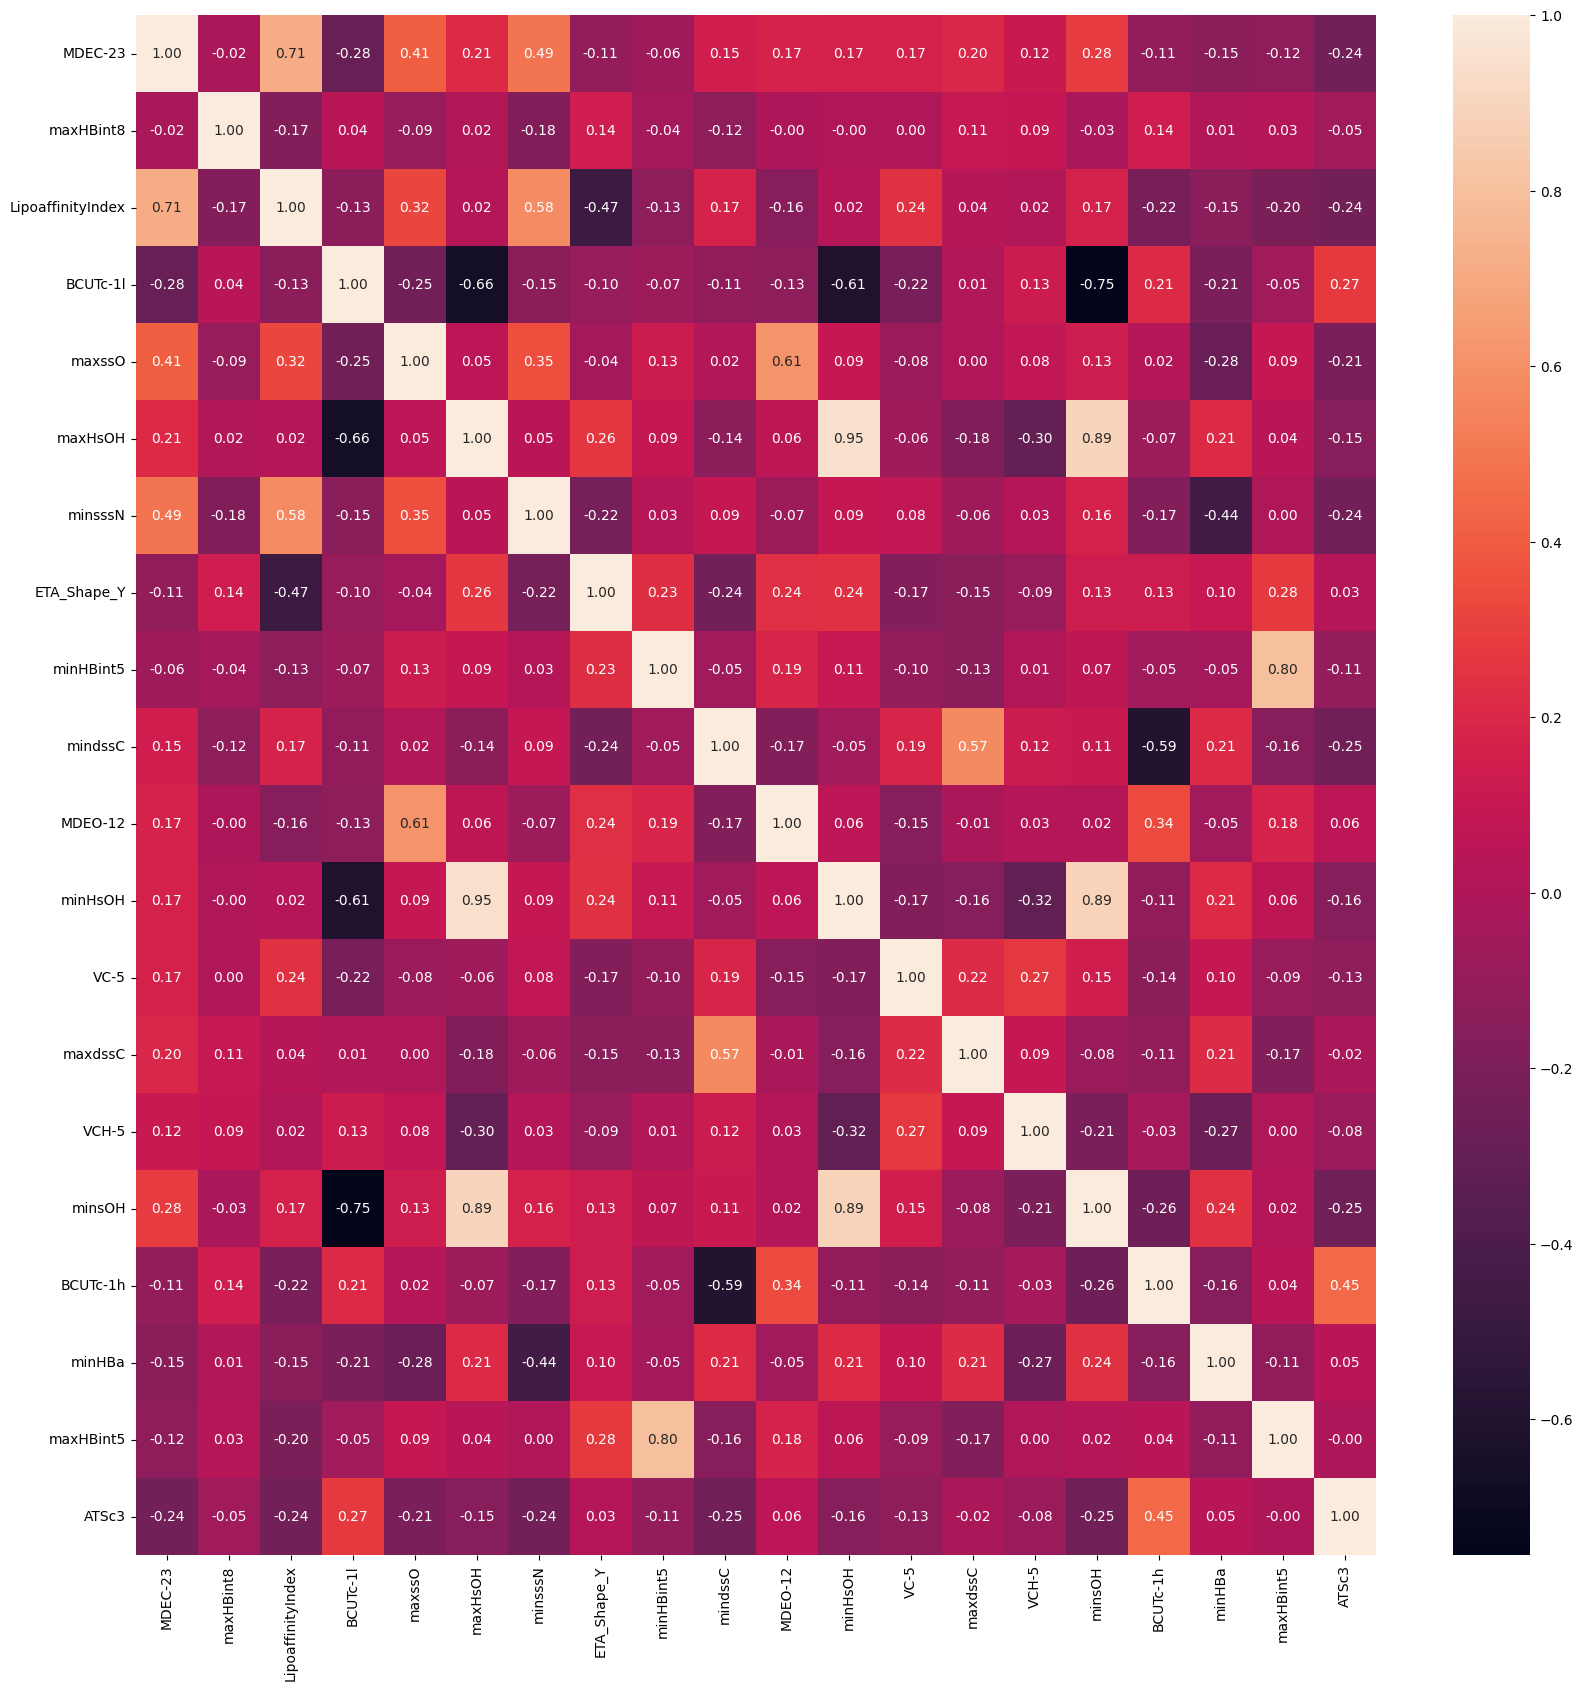

In [23]:
# 得出selected_feature各特征的相关性热力图
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
sns.heatmap(data_selected.corr(), annot=True, fmt='.2f')
# 保存热力图
plt.savefig('data/export/selected_feature_cor_data1.png')

In [24]:
data = pd.read_csv('data/export/data_selected_data1_100.csv', index_col=0)
data

,pIC50,MDEC-23,VCH-5,BCUTc-1l,maxHBint8,maxssO,minHBint5,maxHsOH,ETA_Shape_Y,minsssN,...,LipoaffinityIndex,mindssC,VC-5,minHsOH,maxdssC,BCUTc-1h,minHBa,minsOH,maxHBint5,ATSc3
0,8.602060,28.277932,0.144338,-0.360525,0.0,6.593009,3.092949,0.469126,0.28884,2.516142,...,11.830949,0.000000,0.230311,0.469126,0.000000,0.185437,-1.331303,9.968948,3.092949,-0.126453
1,8.124939,31.076748,0.000000,-0.360530,0.0,6.674642,2.997752,0.449126,0.27105,2.521244,...,13.149974,0.000000,0.230311,0.449126,0.000000,0.185459,-1.378628,10.058948,2.997752,-0.126453
2,8.508638,30.901064,0.000000,-0.361379,0.0,6.502751,3.125957,0.516534,0.30498,2.484448,...,10.577177,0.000000,0.174055,0.480713,0.000000,0.116954,-1.608354,9.752886,3.125957,-0.143126
3,8.408935,30.570001,0.000000,-0.360530,0.0,6.622142,3.022916,0.456486,0.27105,2.519774,...,13.212767,0.000000,0.123273,0.456486,0.000000,0.185459,-1.350874,10.025028,3.022916,-0.126504
4,8.130768,30.570001,0.000000,-0.360530,0.0,6.552810,3.103616,0.473631,0.27105,2.504217,...,12.489691,0.000000,0.123273,0.473631,0.000000,0.185459,-1.449689,9.993342,3.103616,-0.128690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,6.131944,45.421854,0.089576,-0.363905,0.0,6.299676,0.000000,0.511809,0.34146,0.000000,...,10.292932,0.763441,0.208358,0.502282,0.888007,0.278515,5.340113,9.808143,0.000000,0.060040
1970,5.850781,45.421854,0.089576,-0.364009,0.0,6.260832,0.000000,0.536069,0.35897,0.000000,...,7.884092,0.740894,0.208358,0.507282,0.868389,0.278503,5.760169,9.696786,0.000000,0.051389
1971,7.721246,44.466435,0.089576,-0.364009,0.0,6.247428,0.000000,0.545019,0.35897,0.000000,...,7.965074,0.747764,0.208358,0.509751,0.874012,0.278503,5.702148,9.645181,0.000000,0.051394
1972,7.886057,32.179316,0.089576,-0.363866,0.0,6.182281,0.000000,0.535862,0.33708,0.000000,...,6.236558,0.793682,0.208358,0.529269,0.914306,0.278460,5.543112,9.668706,0.000000,0.060397
